In [12]:
%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# NOTE: import will be skipped if you did not install cmocean package
# => to install type in terminal:  easy_install cmocean
# then restart your ipython/jupyter notebook
try:
    import cmocean
except:
    print("""You do NOT have 'cmocean' package installed.
    To install exit the Jupyter/IPython Notebook Kernel
    and type in the terminal: easy_install cmocean""")


In [28]:
FRF = '2' # if 1D, FRF = '1' & if 2D, FRF = '2'

survey = 'Oct8' # or 'Oct8'

FOLDER_NAME = 'FRF2D-2015100612-extended-2412213' # simulation folder
date = '20151006-12' # format = yyyymmdd-hh

TOTAL_TIME = 3640.00 # total time of simulation

Water_Level = 0.30

In [29]:
pwd = os.getcwd()

## FUNWAVE SIMULATIONS:
assert FRF in ['1','2'],"Use FRF = '1' if 1D or FRF = '2' if 2D!"  
assert survey in ['Oct1','Oct8'],"Use survey = 'Oct1' if survey as taken on Oct1 or survey = 'Oct8' if survey as taken on Oct8!" 
if FRF == '1':
    project_Dir = os.path.join(pwd,'FRF1D')
    profile_i = 1 # i index of LIDAr profile in 1D
    
else:
    project_Dir = os.path.join(pwd,'FRF2D')
    PLOT_INTV = 1  # plot interval of simulation
    if survey == 'Oct8':
        profile_i = 195 # i index of LIDAr profile in Oct8-2D (if DY = 2m)
    else:
        profile_i = 36 # i index of LIDAr profile in Oct1-2D (if DY = 2m)

sim_Dir = os.path.join(project_Dir,FOLDER_NAME)
output_Dir = os.path.join(sim_Dir,'output')

plot_Dir = os.path.join(sim_Dir,'plots')
try:
    # Create target Directory
    os.mkdir(plot_Dir)
    print("Directory " , plot_Dir ,  " Created ") 
except FileExistsError:
    print("Directory " , plot_Dir ,  " already exists")
    
    

Directory  /Users/rdchlgs8/Desktop/FRF/post-process/FRF2D/FRF2D-2015100612-extended-2412213/plots  already exists


Loading a total of 3 Hsig files for date = 20151006-12


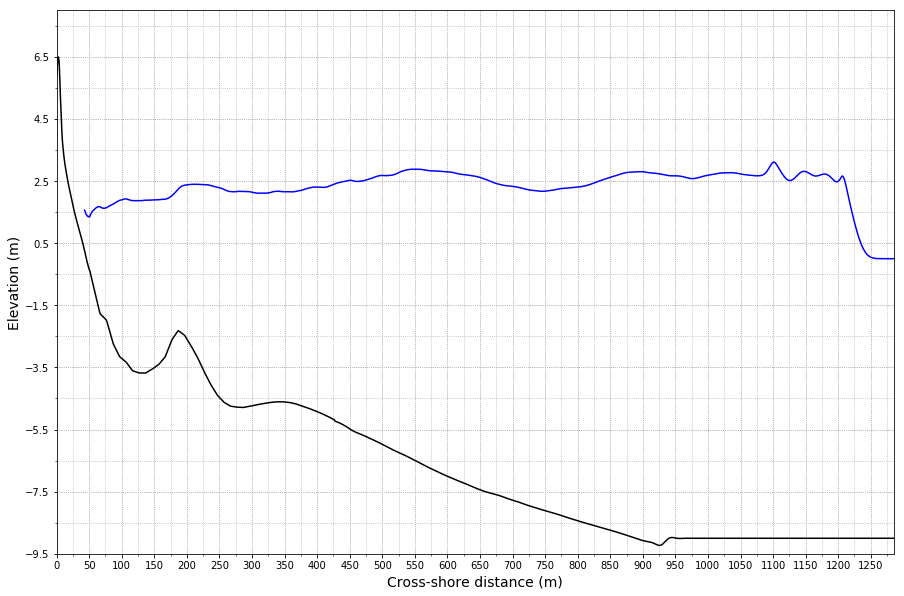

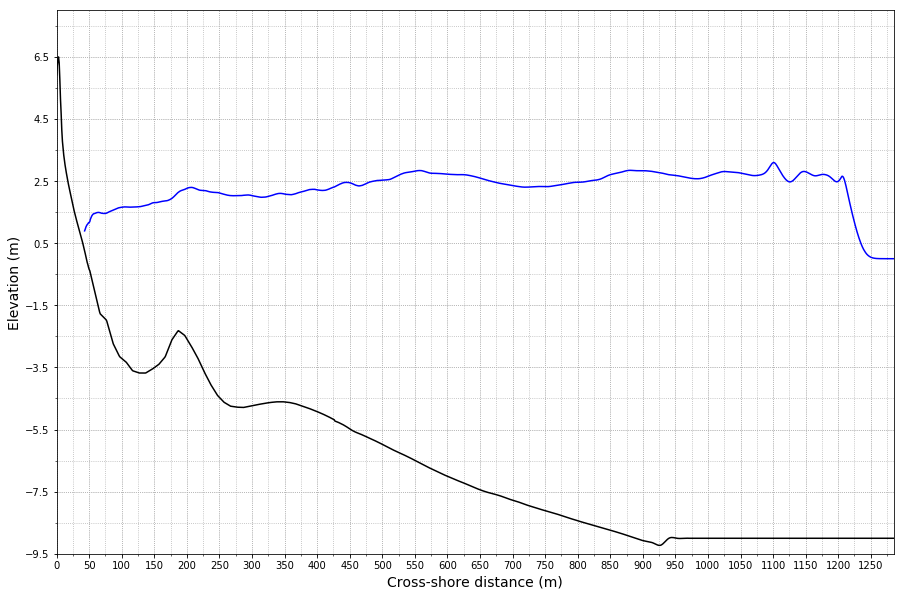

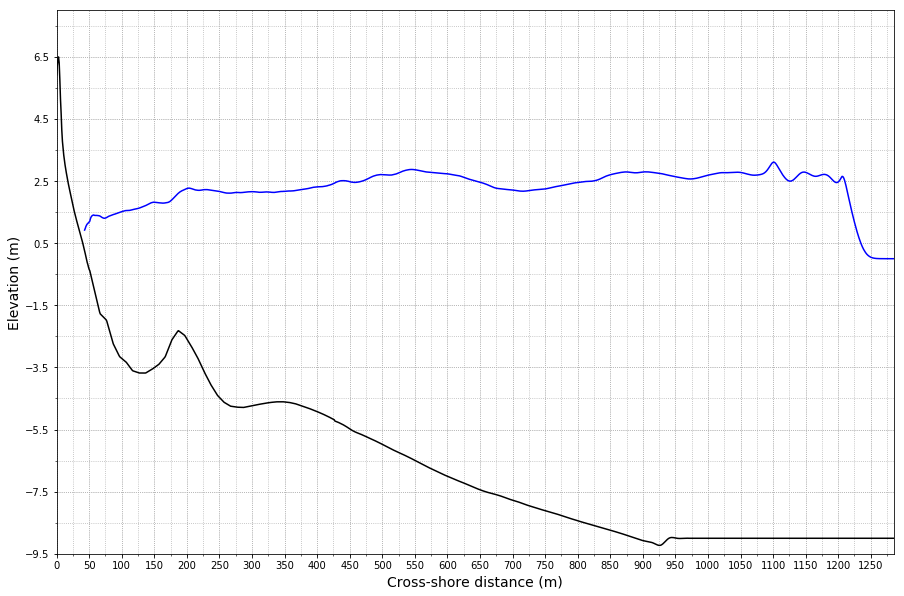

In [30]:
# upload bathy profile from depth.txt
dep = np.loadtxt(os.path.join(output_Dir,'dep.out'))[profile_i,:]*-1 + Water_Level
Nx = len(dep)      

# Spatial discretization step
dx = 1.0

Lx = Nx*dx
x = np.linspace(0,Lx,Nx)

number_of_Hsig = 3

print('Loading a total of %d Hsig files for date = %s'% (number_of_Hsig,date))

for num in range(number_of_Hsig):
    
    Hsig_File = 'Hsig_{0:0>5s}'.format(str(num+1))
    Hsig_path = os.path.join(output_Dir,Hsig_File)

    mask_File = 'mask_00001'.format(str(num+1))
    mask_path = os.path.join(output_Dir,mask_File)

    mask = np.loadtxt(mask_path)[profile_i,:] 
    
    Hsig = np.loadtxt(Hsig_path)[profile_i,:]

    mask_index = np.where( mask == 0.0 )
    Hsig[mask_index] = 'NaN'
    
    fig = plt.figure(figsize=(15.0,10.0))
    ax = fig.add_subplot(1, 1, 1)
    
    plt.plot(x,dep,'k')
    plt.plot(x,Hsig,'b')
    
    plt.axis([0, Lx,-9.5,8])

    x_major_ticks = np.arange(0, Lx, 50)
    x_minor_ticks = np.arange(0, Lx, 25)
    y_major_ticks = np.arange(-9.5, 8, 2)
    y_minor_ticks = np.arange(-9.5, 8, 1)

    ax.set_xticks(x_major_ticks)
    ax.set_xticks(x_minor_ticks, minor=True)
    ax.set_yticks(y_major_ticks)
    ax.set_yticks(y_minor_ticks, minor=True)
    ax.grid(linestyle=':',which='both')

    plt.ylabel('Elevation (m)',fontsize=14)
    plt.xlabel('Cross-shore distance (m)',fontsize=14)
    
    plt.savefig(os.path.join(plot_Dir,'Hsig1D_{0:0>5s}.png'.format(str(num+1))), dpi=300)